### Thank you for visting my code. If there is anything missing or wrong, please feel free to inform me. Also like my page on fb: https://www.facebook.com/codemakerz


#### Stay tuned for the more updates in the same notebook.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))
# LIKE US ON FB: https://www.facebook.com/codemakerz
# Any results you write to the current directory are saved as output.

In [ ]:
# load data
df = pd.read_csv("../input/googleplaystore.csv", encoding='utf-8')

In [ ]:
# So we got our dataset
df.head() 
# Here in our dataset we can see Result = 0, 1 that mean 1 mean selected celebrity has cancer and 0 means no cancer

In [ ]:
# so before visualization lets do some EDA. Exploratory data analysis.

In [ ]:
# Lets find is there any missing values?
df.isnull().sum() # We can see in Rating we have 1474 missing values & 1 value in Type, 1 in content rating and others also

In [ ]:
# Lets see the all columns names
df.columns

In [ ]:
# Find the datatype of all the columns 
df.dtypes

In [ ]:
# total number of records in dataset
df.count()

In [ ]:
# Summary statistics. It will show you the summary statistic for all the numerical values
df.describe()

In [ ]:
# info is also used to see some important statistics for dataset.
df.info()

In [ ]:
# This will show you top 5 Name columns. As head return top 5
df.App.head()

In [ ]:
# you can also do above same thing with array type
df[["App"]].head()

In [ ]:
# show multiple columns
df[["App", "Rating"]].head()

In [ ]:
# you can also watch below 5 using tail
df[["App", "Rating"]].tail()

In [ ]:
# Basic statistics
print("Mean Age: ", df.Rating.mean())
print("Median Age: ", df.Rating.median())
print("Variance Age: ", df.Rating.var())
print("Standard Deviation Age: ", df.Rating.std())
print("25th Percentile of Age: ", df.Rating.quantile(.25))
print("50th Percentile of Age: ", df.Rating.quantile(.5))
print("75th Percentile of Age: ", df.Rating.quantile(.75))

In [ ]:
# position based indexing
# We use iloc for this. Here we mention [row, cols] like this.
# : as row means all the rows & 1:4 as columns means 1st index(2nd columns aqs index start from 0), 3rd column and 4th column. 4th index will not included/
df.iloc[:, 1:4].head()

In [ ]:
# name based indexing
# in below example we are using all the rows(:) and only Name and Age column.
# you can use any indexing method but i usually prefer iloc. As i am more comfortable with indices.
df.loc[:,["App", "Rating"]].head()

In [ ]:
# lets find out different type of Type column
df.Type.value_counts()
# we can see the number of free and paid apps

##### Lets plot Some visualizations

##### We will start with Univariate Distribution

In [ ]:
# Plot Univariate distribution for Ratings using histogram. It will show the total number or app according to the ratings.
# Total number of app acccording to  the ratings
plt.figure(figsize= (15, 10));
#plt.hist(x=df.Rating, color='c');
df.Rating.plot(kind="hist", bins=30, color='c')
plt.title("Univariate: Rating Histogram");
plt.xlabel("Rating");
plt.ylabel("Total Counts");
plt.xlim(right=6)
plt.plot();

In [ ]:
# lets see how many categories are there and total number of apps grouped by category
df.Category.value_counts()
# So it clearly show the count of apps for a particular category. value_counts() is very handly function for this.

In [ ]:
# but really saying this data is not convincing... we can make it more appealing by plotting it.
# lets plot it.
plt.figure(figsize=(15,10))
df.Category.value_counts().plot(kind="bar", rot=0, title="Pclass Vs Count", color='c', );
plt.xticks(rotation='vertical');
plt.title("Category Vs App Count")
plt.xlabel("Category Name")
plt.ylabel("Count")
plt.plot();

In [ ]:
# So now from above example we can see that mostly apps belongs to the family, games , tool category.
# and beauty categroy app is least in number.

In [ ]:
# Lets plot the average rating of eah category.
df.groupby(["Category"]).Rating.mean()
# We can see 1.9 category has a rating of 19.0.. which is not possible as our rating is out of 5.
# So definitly it may be some data issue. Now what to do?

In [ ]:
df[df["Category"] == '1.9'] # We can see Rating has a value of 19.0, which is not possible.
# So we have two choices:
# 1. Either we remove this row
# 2. Correct this value.
# i will not prefer removing row as it is the only row related to the category 1.9.
# lets replace this value with average rating.

In [ ]:
# inplace will save your change to the original dataframe
df["Rating"].replace(19.0, df.Rating.mean(), inplace=True)

In [ ]:
# now lets check again
df[df["Category"] == '1.9'] # So we have finally replaced it to the average value

In [ ]:
df.groupby(["Category"]).Rating.mean() # So we can see now average values are correct for all categries

In [ ]:
plt.figure(figsize=(15,10))
df.groupby(["Category"]).Rating.mean().plot(kind="bar", rot=0, title="Pclass Vs Count");
plt.xticks(rotation='vertical');
plt.xlabel("Category Name")
plt.ylabel("Avg. Rating")
plt.title("Category Vs Avg. Rating")
plt.plot();

In [ ]:
# so now we can see the average rating. As per our data average rating is almost same for all so bars are almost equal.

In [ ]:
df.groupby(["Category", "Installs"]).Rating.mean()

In [ ]:
# Lets find out how many apps are paid or free.
df.Type.value_counts()

In [ ]:
plt.figure(figsize=(15, 10));
df.Type.value_counts().plot(kind="bar");
plt.xlabel("License Type");
plt.ylabel("Counts")
plt.title("License Type Vs Counts")
plt.plot();

In [ ]:
#So from our above diagrame we can see we have huge number of free apps.

In [ ]:
# Lets try to find out the content rating.. that mean how many adult apps are there or how many non-adult apps.
df.columns # it will select content rating column


In [ ]:
df['Content Rating'].value_counts() # you can see we have 6 categories in content rating.

In [ ]:
plt.figure(figsize=(15, 10), dpi=100, );
df["Content Rating"].value_counts().plot(kind="bar");
plt.title("Content Vs Total Count");
plt.xlabel("Content Type");
plt.ylabel("Count");
plt.ylim(bottom=-10);
plt.plot();

In [ ]:
# Actually you can see last two bars are almost hidden because the value is very less.

In [ ]:
# now lets see apps grouped by os version 
df["Android Ver"].value_counts()

In [ ]:
df[df["Android Ver"] == '1.0 and up'] # we can verify the above data by using this command. You can
# simply replace the value of OS and get the number.

In [ ]:
plt.figure(figsize=(15, 10));
plt.xlabel("Anroid Version");
plt.ylabel("Total Apps");
plt.title("Android Version Vs Total Conts");
df["Android Ver"].value_counts().plot(kind="bar");
plt.plot();

In [ ]:
df["Android Ver"].value_counts(normalize=True) # You can get the percentage

In [ ]:
df["Genres"].value_counts() # here can find all the genres.. Try its plot yourself

In [ ]:
# Lets plot top 10 genres
plt.figure(figsize=(15, 10));
df["Genres"].value_counts().head(10).plot(kind="bar");
#df.groupby(["Genres"])..head(10).plot(kind="bar");
plt.title("Top 10 Genres");
plt.xlabel("Genres");
plt.ylabel("Count");
plt.plot();

In [ ]:
# you can verify using below statement.
# So found the genre wise installs
df[df["Genres"] == 'Video Players & Editors;Music & Video']

In [ ]:
# We need to change the dtype of review but there is one column whih contains 3.0M
df.Reviews.replace("3.0M", '3000000', inplace=True)
df[df.Reviews == "3.0M"]

In [ ]:
df.Reviews = df.Reviews.astype("float") # lets change the datatype of Ratings

In [ ]:

df_new = df.groupby(["Genres", "Category"], as_index=False).sum()[["Genres", "Category", "Reviews"]].sort_values(by="Reviews", ascending=False).head(10)


In [ ]:
df_new

In [ ]:
# Below diagram shows the ;top 10 famous genres as per there review counts
plt.figure(figsize=(15, 10));
plt.title("Top 10 Most Reviewed Genres");
plt.xlabel("Genres");
plt.ylabel("Count");
df_new.groupby("Genres").Reviews.sum().sort_values(ascending=False).plot(kind='bar');
plt.plot();

In [ ]:
# lets find out category wise application type, how many free and paid apps are there in a category.
pd.crosstab(df["Category"], df["Type"]).apply(lambda r: r/r.sum(), axis=1)

In [ ]:
# AS we can see there is one app with type 0, which is obviously not the proper type. Lets fetch that row.
indexNames = df[df["Type"]== '0'].index # find the index
# So we can see its pricing is also not there(everything) and installs section is free. So in this case this data seems to be improper.
# as it doesnt have any exceptional infomrmation so we can remove this.
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True) # delete the row

In [ ]:
pd.crosstab(df["Category"], df["Type"]).plot(kind="bar",figsize=(15, 10));
plt.plot();


In [ ]:
# Handle missing values
df.isnull().sum() # we can see 4 columns have missing values. Lets start with Type

### Handle Missing Value in Type

In [ ]:
df[df.Type.isnull()] # lets fetch first

In [ ]:
# As we can clearly see, its price is 0 that mean it is from free type. So we can replace it.
df.Type.fillna("Free", inplace=True) # replaced

In [267]:
df[df.Type.isnull()]  # No null values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [286]:
# now lets handle android version column missing values
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN,2018
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN,2018


In [277]:
# We can see we have android ver for both of the records. Lets see a crosstab for android ver and current ver
pd.crosstab(df[(df['Current Ver'] == '4.4')]['Current Ver'], df[(df['Current Ver'] == '4.4')]["Android Ver"])

Android Ver,2.1 and up,2.3 and up,4.0.3 and up,4.2 and up,4.4 and up
Current Ver,,,,,
4.4,1,1,2,1,2


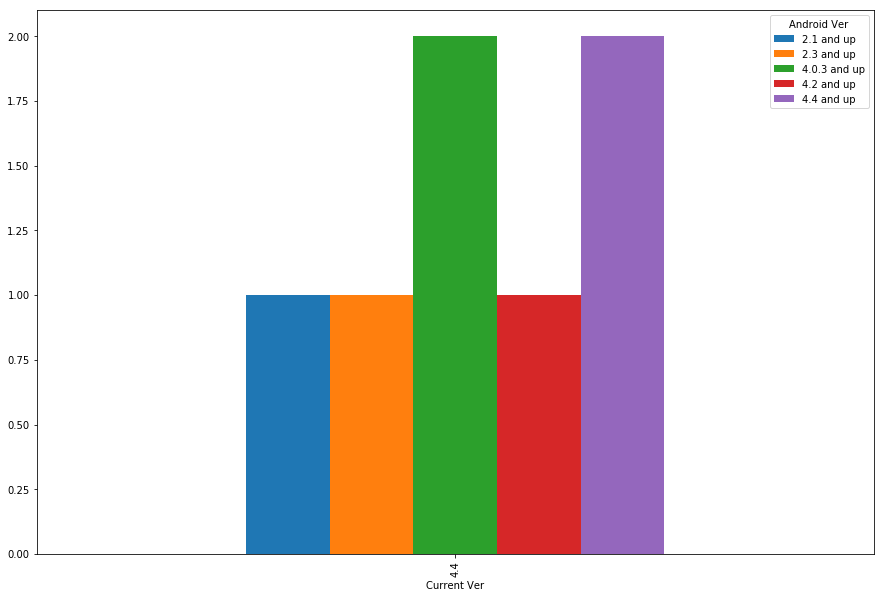

In [275]:
pd.crosstab(df[(df['Current Ver'] == '4.4')]['Current Ver'], df['Android Ver']).plot(kind='bar', figsize=(15, 10))

In [278]:
def get_year(date):
    year = date.split(',')[1]
    year = year.strip()
    return year

In [281]:
df["Last Updated"].map(lambda x: get_year(x)) # we get the year

0        2018
1        2018
2        2018
3        2018
4        2018
5        2017
6        2018
7        2018
8        2017
9        2018
10       2017
11       2018
12       2018
13       2018
14       2018
15       2018
16       2018
17       2017
18       2018
19       2018
20       2018
21       2018
22       2018
23       2018
24       2018
25       2018
26       2017
27       2018
28       2018
29       2017
         ... 
10811    2018
10812    2018
10813    2018
10814    2015
10815    2018
10816    2018
10817    2015
10818    2016
10819    2017
10820    2018
10821    2018
10822    2017
10823    2018
10824    2018
10825    2018
10826    2018
10827    2018
10828    2017
10829    2016
10830    2014
10831    2018
10832    2014
10833    2014
10834    2017
10835    2016
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: Last Updated, Length: 10840, dtype: object

In [282]:
# lets create a new column for year
df["Year"] = df["Last Updated"].map(lambda x: get_year(x))

In [283]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018


In [288]:
# now lets plot crosstab for year and android ver
pd.crosstab(df[df["Year"] == '2018'].Year, df["Android Ver"])

Android Ver,1.0 and up,1.5 and up,1.6 and up,2.0 and up,2.0.1 and up,2.1 and up,2.2 and up,2.3 and up,2.3.3 and up,3.0 and up,3.2 and up,4.0 and up,4.0.3 - 7.1.1,4.0.3 and up,4.1 and up,4.2 and up,4.3 and up,4.4 and up,4.4W and up,5.0 - 7.1.1,5.0 - 8.0,5.0 and up,5.1 and up,6.0 and up,7.0 - 7.1.1,7.0 and up,7.1 and up,8.0 and up,Varies with device
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,1,1,10,5,1,27,24,185,59,62,11,797,2,1046,1944,300,180,828,10,1,1,547,18,47,1,39,2,6,1192


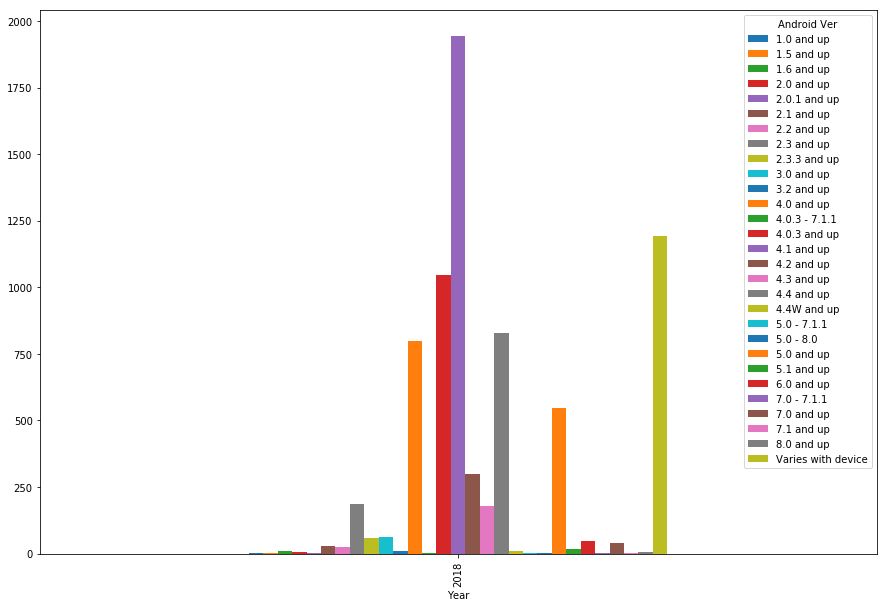

In [289]:
pd.crosstab(df[df["Year"] == '2018'].Year, df["Android Ver"]).plot(kind='bar', figsize=(15, 10))

In [292]:
# so we can see in year 2018 mostly app were using android version 4.1 and up. So this seems a fair analysis. Let replace with this value.
most_frequent_andoid = df['Android Ver'].value_counts().idxmax()
df["Android Ver"].fillna(most_frequent_andoid, inplace=True)

In [293]:
# lets check again for null values in android version
df[df["Android Ver"].isnull()] # So no records... its done.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year


In [296]:
# lets check again for null values in whole data frame
df.isnull().sum() # so we can see rating has a big number of missing values. Lets deal with it.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
Year                 0
dtype: int64

In [300]:
pd.options.display.max_rows  = 15  # it will display always 15 rows.

In [302]:
# lets fetch all the missing value rows for Rating
df[df["Rating"].isnull()] # there are total 1474 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61.0,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up,2018
113,Wrinkles and rejuvenation,BEAUTY,NaN,182.0,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up,2017
123,Manicure - nail design,BEAUTY,NaN,119.0,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up,2018
126,Skin Care and Natural Beauty,BEAUTY,NaN,654.0,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up,2018
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77.0,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up,2017
130,Recipes and tips for losing weight,BEAUTY,NaN,35.0,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up,2017
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30.0,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,PLMGSS FR,PRODUCTIVITY,NaN,0.0,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up,2017
10823,List iptv FR,VIDEO_PLAYERS,NaN,1.0,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up,2018


In [304]:
 #Lets get the median review according to genre and category
df.groupby(["Genres", "Category"]).Rating.median()

Genres                                 Category     
Action                                 GAME             4.3
Action;Action & Adventure              FAMILY           4.3
                                       GAME             4.3
Adventure                              GAME             4.3
Adventure;Action & Adventure           FAMILY           4.5
                                       GAME             4.5
Adventure;Brain Games                  FAMILY           4.6
                                                       ... 
Video Players & Editors                VIDEO_PLAYERS    4.2
Video Players & Editors;Creativity     FAMILY           4.1
                                       VIDEO_PLAYERS    4.1
Video Players & Editors;Music & Video  FAMILY           4.0
                                       VIDEO_PLAYERS    4.0
Weather                                WEATHER          4.3
Word                                   GAME             4.4
Name: Rating, Length: 149, dtype: float64

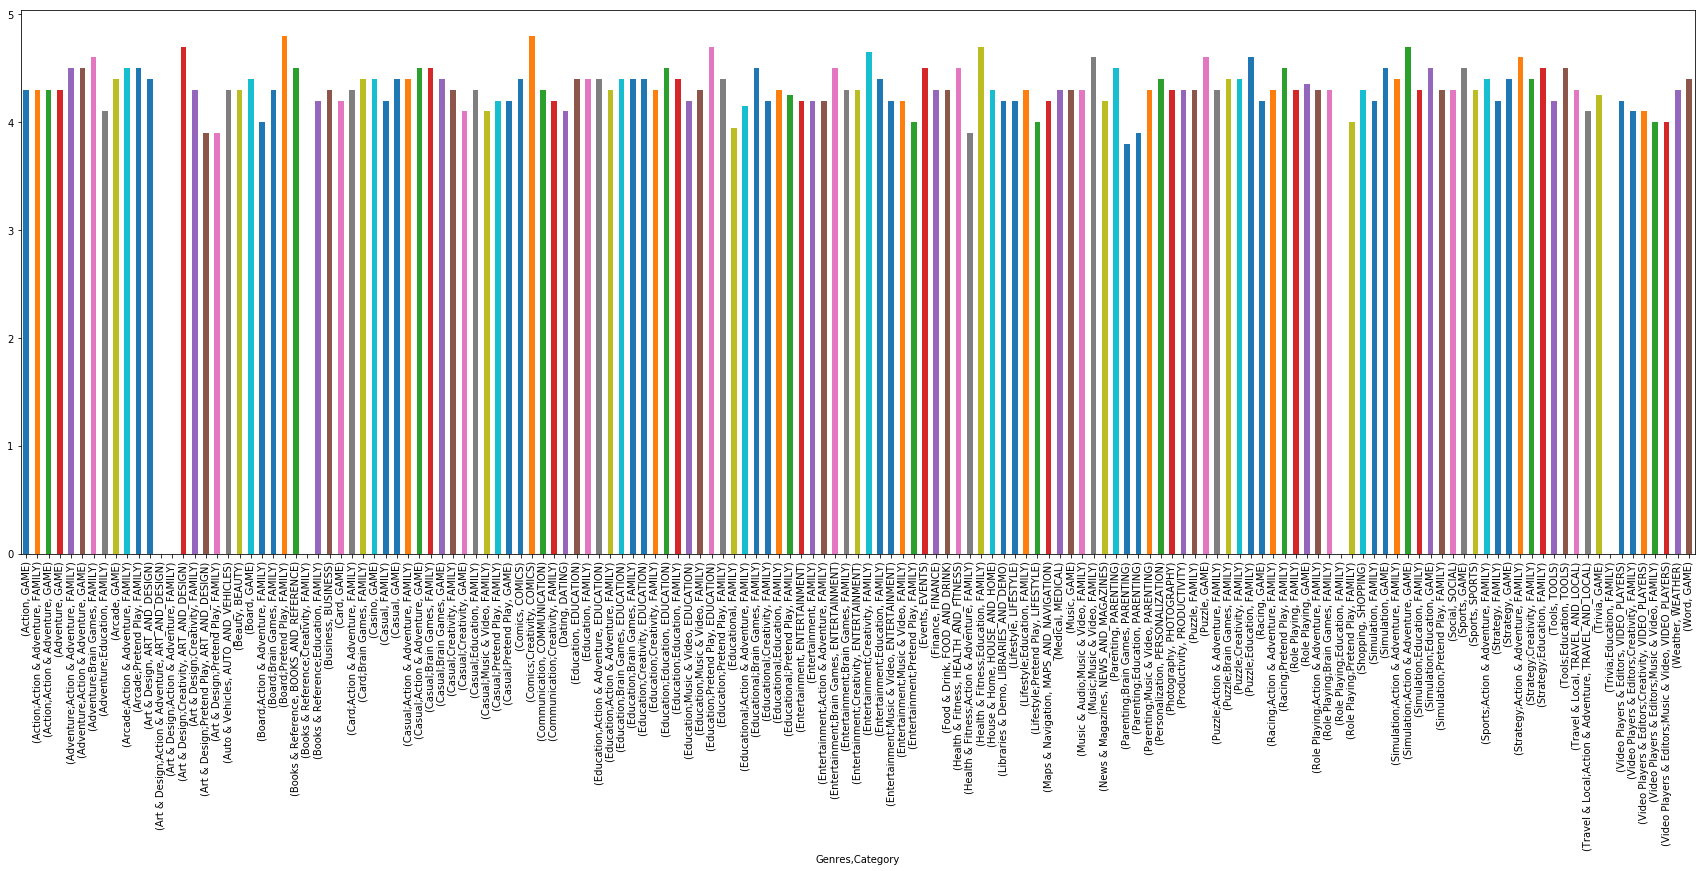

In [310]:
df.groupby(["Genres", "Category"]).Rating.median().plot(kind="bar", figsize=(30, 10));
# so we can see Ratings for all the genres and category are simillar. 

In [311]:
# lets find out the median rating of total df
df.Rating.median() # in this case our median is also simillar to category and genres wise grouped data. so lets replace with this data only.

4.3

In [312]:
median_rating = df.Rating.median()
df.Rating.fillna(median_rating, inplace = True)

In [314]:
df[df.Rating.isnull()] # so finally we replaced all the missing values. Lets check it

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year


In [315]:
df.isnull().sum() # so finally we got rid of missing values.

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
Year              0
dtype: int64

### Thank you for visting my code. If there is anything missing or wrong, please feel free to inform me. Also like my page on fb: https://www.facebook.com/codemakerz

In [ ]:
# lets calculate the median price of app in every category.